In [360]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as rcf
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.model_selection import cross_val_score
#from lightgbm import LGBMClassifier as lgb
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
#from catboost import CatBoostClassifier, Pool

In [361]:
train_df = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\0753aae4bec411eb\Train.csv')
test_df = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\0753aae4bec411eb\Test.csv')
sub = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\0753aae4bec411eb\submission.csv')

In [362]:
print (train_df.shape)
print (test_df.shape)

(13645, 22)
(8745, 20)


In [363]:
train_df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [364]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [365]:
test_df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [366]:
train_df.describe()

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,13150.781239,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,6475.019626,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,2001.000000,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,7501.000000,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,13173.000000,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,18718.000000,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,24390.000000,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


In [367]:
train_df.isna().sum()
train_df.isnull().sum() / len(train_df)

EmpID                      0.000000
EmpName                    0.000000
LanguageOfCommunication    0.000000
Age                        0.000000
Gender                     0.000000
JobProfileIDApplyingFor    0.000000
HighestDegree              0.000000
DegreeBranch               0.000000
GraduatingInstitute        0.000000
LatestDegreeCGPA           0.000000
YearsOfExperince           0.000000
GraduationYear             0.000000
CurrentCTC                 0.000000
ExpectedCTC                0.000000
MartialStatus              0.000000
EmpScore                   0.000000
CurrentDesignation         0.000000
CurrentCompanyType         0.000000
DepartmentInCompany        0.000000
TotalLeavesTaken           0.000000
BiasInfluentialFactor      0.244485
FitmentPercent             0.000000
dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FitmentPercent', ylabel='Density'>

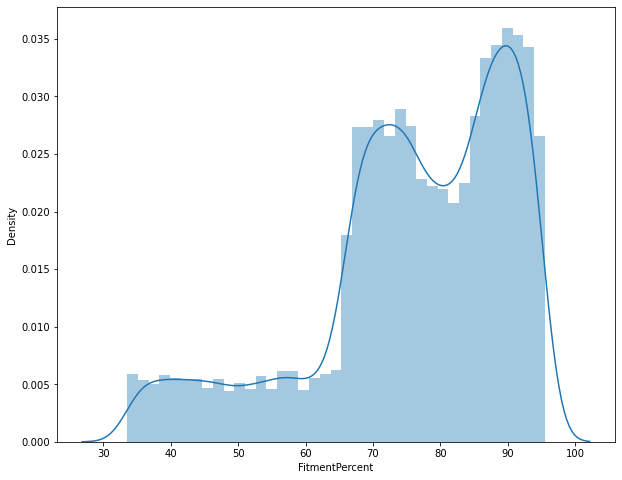

In [368]:
sns.distplot(train_df['FitmentPercent'])

#Here data contains Outliers  Data set contains 14000 rows only So only we remove information may be it will effect on business case

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FitmentPercent'>

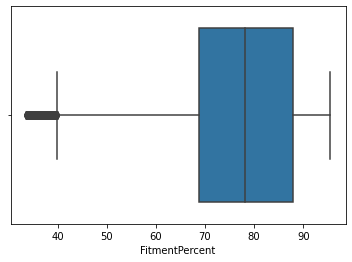

In [10]:
sns.boxplot(train_df['FitmentPercent'])

In [369]:
train_df['FitmentPercent'].describe()

count    13645.000000
mean        75.880093
std         14.894207
min         33.530000
25%         68.720000
50%         78.110000
75%         87.990000
max         95.500000
Name: FitmentPercent, dtype: float64

In [11]:
#  points below 40, these are outliers

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='FitmentPercent'>

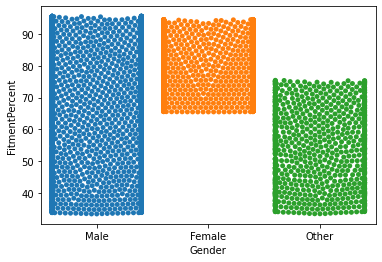

In [13]:
sns.swarmplot(x="Gender", y="FitmentPercent", data=train_df)s

#From the above plot we can observe that for female gender the fitmentpercent above 60 percent

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GraduatingInstitute', ylabel='FitmentPercent'>

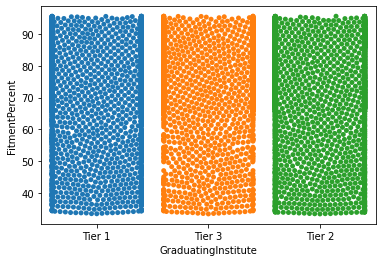

In [14]:
sns.swarmplot(x="GraduatingInstitute", y="FitmentPercent", data=train_df)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='MartialStatus', ylabel='FitmentPercent'>

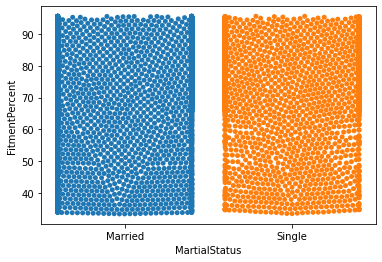

In [15]:
sns.swarmplot(x="MartialStatus", y="FitmentPercent", data=train_df)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CurrentCompanyType', ylabel='FitmentPercent'>

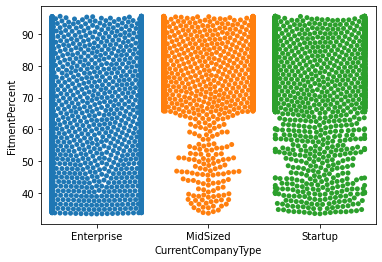

In [18]:
sns.swarmplot(x="CurrentCompanyType", y="FitmentPercent", data=train_df)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the 

<AxesSubplot:xlabel='CurrentDesignation', ylabel='FitmentPercent'>

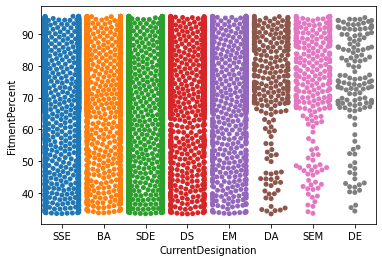

In [29]:
sns.swarmplot(x="CurrentDesignation", y="FitmentPercent", data=train_df)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

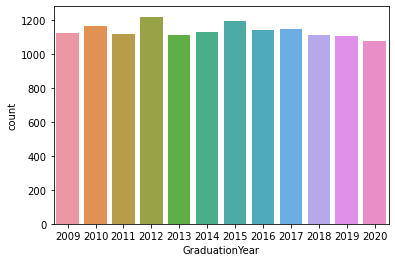

In [40]:
sns.countplot(train_df['GraduationYear'])

<AxesSubplot:xlabel='BiasInfluentialFactor', ylabel='YearsOfExperince'>

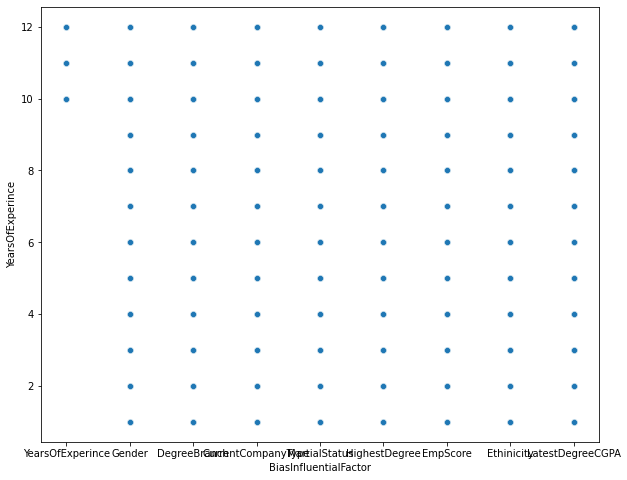

In [67]:
sns.scatterplot(y="YearsOfExperince", x="BiasInfluentialFactor", data=train_df)

#From the above plot we can seen If Years of experience greater then 10 that will effect on  Bias Influential factor 

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the 

<AxesSubplot:xlabel='YearsOfExperince', ylabel='FitmentPercent'>

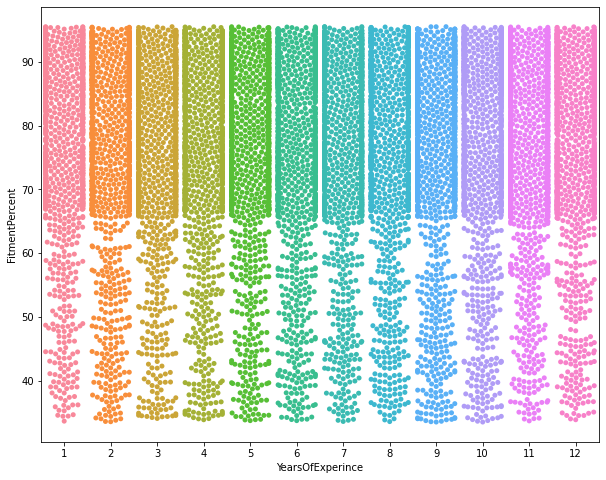

In [390]:
sns.swarmplot(x="YearsOfExperince", y="FitmentPercent", data=train_df)

<AxesSubplot:xlabel='Age', ylabel='YearsOfExperince'>

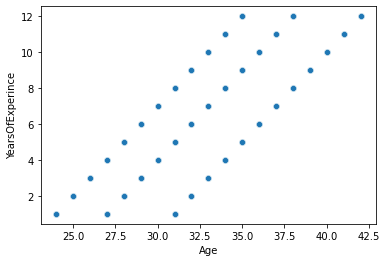

In [24]:
sns.scatterplot(x = train_df['Age'], y = train_df['YearsOfExperince'])

In [ ]:
#we can observe that age increases experience also increases so two variables are correalted each other

<AxesSubplot:xlabel='CurrentCTC', ylabel='ExpectedCTC'>

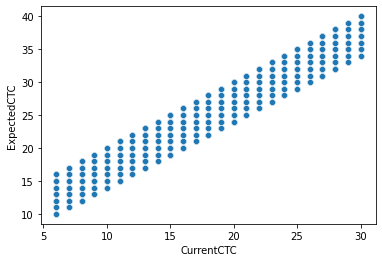

In [28]:
sns.scatterplot(x = train_df['CurrentCTC'], y = train_df['ExpectedCTC'])

In [25]:
#we can observe that Current CTC increases expected CTC also increases so two variables are correalted each other

<AxesSubplot:xlabel='Age', ylabel='CurrentCTC'>

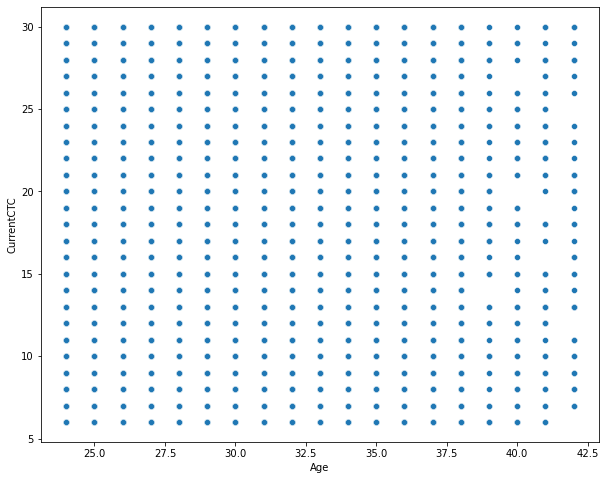

In [371]:
sns.scatterplot(x = train_df['Age'], y = train_df['CurrentCTC'])

<AxesSubplot:xlabel='Gender'>

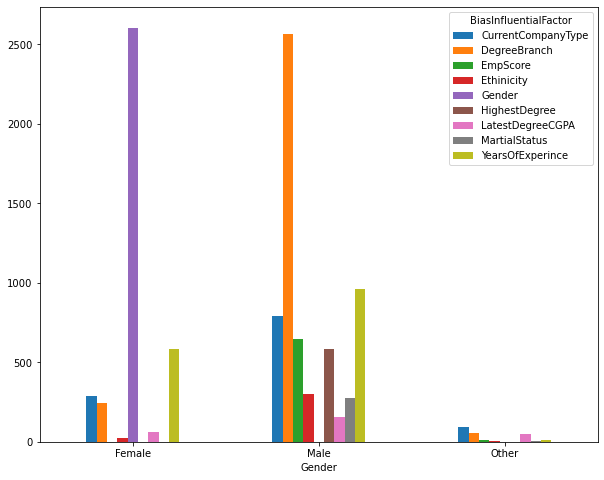

In [33]:
CrosstabResult=pd.crosstab(index=train_df['Gender'],columns=train_df['BiasInfluentialFactor'])
CrosstabResult.plot.bar(figsize=(10,8), rot=0)

# From the Above plot we can seen Bias Influential factor  ('GENDER)is more for  Female Candidates

<AxesSubplot:xlabel='CurrentCompanyType'>

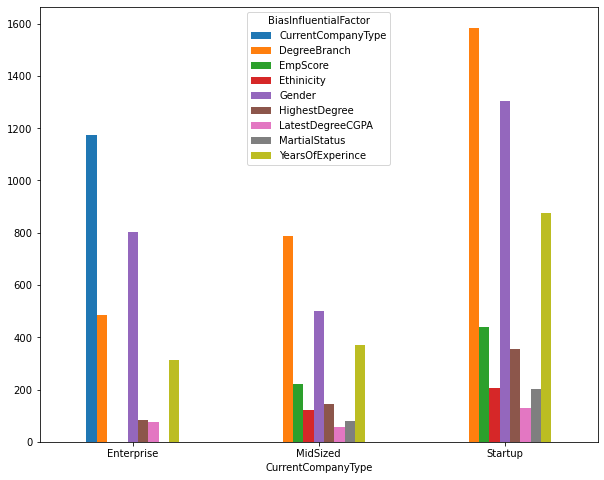

In [34]:
CrosstabResult=pd.crosstab(index=train_df['CurrentCompanyType'],columns=train_df['BiasInfluentialFactor'])
CrosstabResult.plot.bar(figsize=(10,8), rot=0)

#Current Comapny type enterprice is more bias for Bias influence Factor

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 99.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='CurrentCompanyType'>

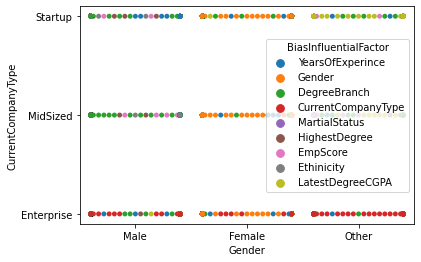

In [35]:
sns.swarmplot(data=train_df,x='Gender',y='CurrentCompanyType',hue='BiasInfluentialFactor')

In [54]:
sp_pivot = train_df.pivot_table(index='BiasInfluentialFactor', values='FitmentPercent', aggfunc=np.median)
sp_pivot

,FitmentPercent
BiasInfluentialFactor,
CurrentCompanyType,67.790
DegreeBranch,85.830
EmpScore,88.130
Ethinicity,87.450
Gender,82.090
HighestDegree,86.300
LatestDegreeCGPA,66.835
MartialStatus,85.085
YearsOfExperince,84.490


In [55]:
train_df.columns    

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [372]:
#separate variables into new data frames
numeric_data = train_df.select_dtypes(include=[np.number])
cat_data = train_df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 10 numeric and 12 categorical columns in train data


In [373]:
del numeric_data['EmpID']
#numeric_data.head()


In [374]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

<AxesSubplot:>

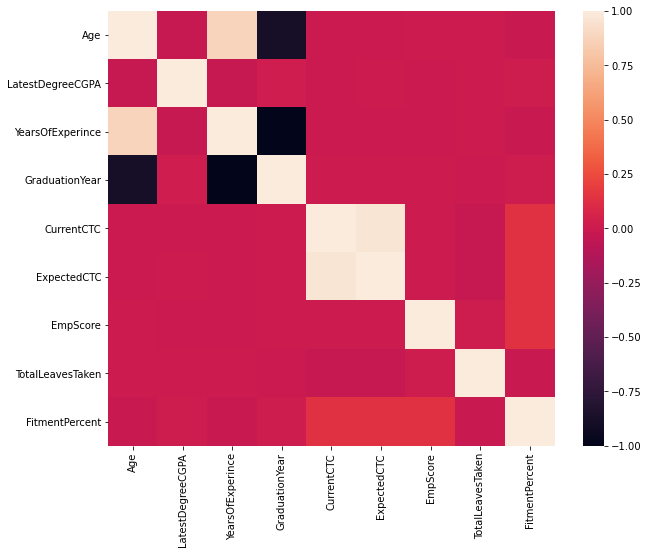

In [375]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [376]:
print (corr['FitmentPercent'].sort_values(ascending=False), '\n') 
print ('----------------------')
print (corr['FitmentPercent'].sort_values(ascending=False)) 

FitmentPercent      1.000000
EmpScore            0.140494
CurrentCTC          0.139495
ExpectedCTC         0.133717
LatestDegreeCGPA    0.011049
GraduationYear      0.008466
YearsOfExperince   -0.008466
TotalLeavesTaken   -0.013438
Age                -0.014188
Name: FitmentPercent, dtype: float64 

----------------------
FitmentPercent      1.000000
EmpScore            0.140494
CurrentCTC          0.139495
ExpectedCTC         0.133717
LatestDegreeCGPA    0.011049
GraduationYear      0.008466
YearsOfExperince   -0.008466
TotalLeavesTaken   -0.013438
Age                -0.014188
Name: FitmentPercent, dtype: float64


# Target Variable less correalted with independet Variables

# Checking For Multicolinearity

In [379]:
print (corr['Age'].sort_values(ascending=False), '\n') 
print ('----------------------')
print (corr['Age'].sort_values(ascending=False)) 

Age                 1.000000
YearsOfExperince    0.879819
TotalLeavesTaken    0.002090
EmpScore            0.001010
CurrentCTC         -0.002504
ExpectedCTC        -0.002661
FitmentPercent     -0.014188
LatestDegreeCGPA   -0.016065
GraduationYear     -0.879819
Name: Age, dtype: float64 

----------------------
Age                 1.000000
YearsOfExperince    0.879819
TotalLeavesTaken    0.002090
EmpScore            0.001010
CurrentCTC         -0.002504
ExpectedCTC        -0.002661
FitmentPercent     -0.014188
LatestDegreeCGPA   -0.016065
GraduationYear     -0.879819
Name: Age, dtype: float64


# Both Age & Years of Experience are Highly correlated

In [380]:
print (corr['CurrentCTC'].sort_values(ascending=False), '\n') 
print ('----------------------')
print (corr['CurrentCTC'].sort_values(ascending=False)) 

CurrentCTC          1.000000
ExpectedCTC         0.963368
FitmentPercent      0.139495
EmpScore            0.007050
GraduationYear      0.004947
LatestDegreeCGPA   -0.000750
Age                -0.002504
YearsOfExperince   -0.004947
TotalLeavesTaken   -0.015754
Name: CurrentCTC, dtype: float64 

----------------------
CurrentCTC          1.000000
ExpectedCTC         0.963368
FitmentPercent      0.139495
EmpScore            0.007050
GraduationYear      0.004947
LatestDegreeCGPA   -0.000750
Age                -0.002504
YearsOfExperince   -0.004947
TotalLeavesTaken   -0.015754
Name: CurrentCTC, dtype: float64


In [377]:
numeric_data.columns

Index(['Age', 'LatestDegreeCGPA', 'YearsOfExperince', 'GraduationYear',
       'CurrentCTC', 'ExpectedCTC', 'EmpScore', 'TotalLeavesTaken',
       'FitmentPercent'],
      dtype='object')

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_df[['Age', 'LatestDegreeCGPA', 'YearsOfExperince', 'GraduationYear',
       'CurrentCTC', 'ExpectedCTC', 'EmpScore', 'TotalLeavesTaken',
       'FitmentPercent']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature         VIF
0               Age    4.429429
1  LatestDegreeCGPA    1.000533
2  YearsOfExperince   20.954704
3    GraduationYear  256.494549
4        CurrentCTC   13.932171
5       ExpectedCTC   13.912296
6          EmpScore    1.020599
7  TotalLeavesTaken    1.000553
8    FitmentPercent    1.041147


# Here some of the varibles have Large VIF Value

In [52]:
# Fisrt qe remove NA values from the data then train model on top it fro classification & regression

In [53]:
train_df.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [102]:
#Missing Valu Imputation


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [382]:
train = train_df.copy()



In [383]:

train['BiasInfluentialFactor'].loc[(train['Gender'] == 'Male') & (train['HighestDegree'] == 'MS') & (train['BiasInfluentialFactor'].isnull())]='HighestDegree'


train['BiasInfluentialFactor'].loc[ (train['CurrentCompanyType'] == 'Enterprise') & (train['BiasInfluentialFactor'].isnull())]='CurrentCompanyType'


train['BiasInfluentialFactor'].loc[(train['Gender'] == 'FeMale') & (train['DegreeBranch'] == 'Information Technology') & (train['BiasInfluentialFactor'].isnull())]='DegreeBranch'

train['BiasInfluentialFactor'].loc[(train['Gender'] == 'FeMale') & (train['DegreeBranch'] == 'Computer Science') & (train['BiasInfluentialFactor'].isnull())]='DegreeBranch'

train['BiasInfluentialFactor'].loc[(train['Gender'] == 'Male') & (train['DegreeBranch'] == 'Information Technology') & (train['BiasInfluentialFactor'].isnull())]='DegreeBranch'

train['BiasInfluentialFactor'].loc[(train['Gender'] == 'Male') & (train['DegreeBranch'] == 'Computer Science') & (train['BiasInfluentialFactor'].isnull())]='DegreeBranch'


train['BiasInfluentialFactor'].loc[(train['Gender'] == 'Male') & (train['MartialStatus'] == 'Married') & (train['EmpScore'] == 3) &(train['BiasInfluentialFactor'].isnull())]='MartialStatus'

train['BiasInfluentialFactor'].loc[(train['Gender'] == 'Other') & (train['MartialStatus'] == 'Married') & (train['EmpScore'] == 3) &(train['BiasInfluentialFactor'].isnull())]='MartialStatus'

train['BiasInfluentialFactor'].loc[(train['EmpScore'] >= 4)  & (train['BiasInfluentialFactor'].isnull())]='EmpScore'

train['BiasInfluentialFactor'].loc[(train['LatestDegreeCGPA'] > 8) & (train['BiasInfluentialFactor'].isnull())]='LatestDegreeCGPA'

train['BiasInfluentialFactor'].loc[(train['YearsOfExperince'] >= 10)  & (train['BiasInfluentialFactor'].isnull())]='YearsOfExperince'

train['BiasInfluentialFactor'].loc[(train['Gender'] == 'Female')  & (train['BiasInfluentialFactor'].isnull())]='Gender'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single

In [385]:
train.isnull().sum()

EmpID                        0
EmpName                      0
LanguageOfCommunication      0
Age                          0
Gender                       0
JobProfileIDApplyingFor      0
HighestDegree                0
DegreeBranch                 0
GraduatingInstitute          0
LatestDegreeCGPA             0
YearsOfExperince             0
GraduationYear               0
CurrentCTC                   0
ExpectedCTC                  0
MartialStatus                0
EmpScore                     0
CurrentDesignation           0
CurrentCompanyType           0
DepartmentInCompany          0
TotalLeavesTaken             0
BiasInfluentialFactor      407
FitmentPercent               0
dtype: int64

In [281]:
#Based Fileter We are Imputing Missing valies Here,But For ethnicity there is no speicfic Filter to impute the data

In [282]:
train.shape

(13645, 22)

In [283]:
train = train.dropna()

In [284]:
train.shape

(13238, 22)

In [285]:
train['BiasInfluentialFactor'].value_counts()

DegreeBranch          3080
Gender                2833
CurrentCompanyType    2504
YearsOfExperince      1701
EmpScore              1145
HighestDegree          758
MartialStatus          559
LatestDegreeCGPA       330
Ethinicity             328
Name: BiasInfluentialFactor, dtype: int64

In [286]:
train['BiasInfluentialFactor'] = train['BiasInfluentialFactor'].apply({'DegreeBranch':1,'Gender':2,'CurrentCompanyType':3,'YearsOfExperince':4,'EmpScore':5,'HighestDegree':6,'MartialStatus':7,'LatestDegreeCGPA':8,'Ethinicity':9}.get)
train.head(5)

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,4,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,5,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,2,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,2,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,1,86.34


In [318]:
train_copy = train.copy()

In [319]:
#df.drop(['C', 'D'], axis = 1)
train_copy = train_copy.drop(['EmpID','EmpName','JobProfileIDApplyingFor','GraduationYear','BiasInfluentialFactor'],axis =1)


test_copy = test_df.drop(['EmpID','EmpName','JobProfileIDApplyingFor','GraduationYear'],axis =1)


In [320]:
train_copy.shape

(13238, 17)

In [321]:
test_copy.shape

(8745, 16)

In [322]:
train_copy.dtypes

LanguageOfCommunication     object
Age                          int64
Gender                      object
HighestDegree               object
DegreeBranch                object
GraduatingInstitute         object
LatestDegreeCGPA             int64
YearsOfExperince             int64
CurrentCTC                   int64
ExpectedCTC                  int64
MartialStatus               object
EmpScore                     int64
CurrentDesignation          object
CurrentCompanyType          object
DepartmentInCompany         object
TotalLeavesTaken             int64
FitmentPercent             float64
dtype: object

In [331]:
train_copy = pd.get_dummies(train_copy)
test_copy = pd.get_dummies(test_copy)

In [324]:
#pd.get_dummies(data =train, columns=['LanguageOfCommunication','Gender','HighestDegree','DegreeBranch','GraduatingInstitute','MartialStatus','CurrentDesignation','CurrentCompanyType','DepartmentInCompany'])

In [325]:
train_copy.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,...,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,35,7,12,21,26,5,20,95.40,1,0,...,0,1,1,0,0,0,1,0,0,0
1,26,7,3,15,19,5,6,67.09,1,0,...,0,0,0,1,0,0,0,1,0,0
2,36,6,6,15,24,5,19,91.26,1,0,...,0,0,0,1,0,0,0,1,0,0
3,29,5,6,16,24,5,16,72.29,1,0,...,0,0,0,0,1,0,0,0,0,1
4,25,8,2,24,32,5,10,86.34,1,0,...,0,0,1,0,0,0,0,1,0,0


In [326]:
from sklearn.model_selection import train_test_split

In [327]:
y = train_copy['FitmentPercent']
X = train_copy.drop(['FitmentPercent'],axis =1)

In [328]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  BASE MODEL

In [329]:
import xgboost as xgb

In [330]:

model = xgb.XGBRegressor(learning_rate =0.1,
                    n_estimators=2000,
                    max_depth=5,
                    min_child_weight=3,
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                    scale_pos_weight=1,
                    seed=27).fit(X_train,y_train)

In [332]:
y_pred = model.predict(X_test)

In [334]:
y_pred_test = model.predict(test_copy)

In [333]:
y_pred

array([79.229065, 78.50161 , 79.229126, ..., 43.54346 , 83.45825 ,
       87.3406  ], dtype=float32)

In [229]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does

print("XGBoost score on training set: ", rmse(y_test, y_pred))


XGBoost score on training set:  8.723109286245776


In [387]:
for col,score in zip(X_train.columns,model.feature_importances_):
    print(col,score)

Age 0.007401963
LatestDegreeCGPA 0.0076063834
YearsOfExperince 0.0074663972
CurrentCTC 0.02398755
ExpectedCTC 0.010553277
EmpScore 0.026142769
TotalLeavesTaken 0.0075796037
LanguageOfCommunication_English 0.0071915556
LanguageOfCommunication_Hindi 0.0074663186
LanguageOfCommunication_Native 0.007721761
Gender_Female 0.19377485
Gender_Male 0.07555155
Gender_Other 0.12633958
HighestDegree_B.Tech 0.007107445
HighestDegree_BCA 0.0077453335
HighestDegree_Dual M.Tech 0.0071493066
HighestDegree_Dual MBA 0.008480571
HighestDegree_M.Tech 0.0077038445
HighestDegree_MCA 0.009450776
HighestDegree_MS 0.008569207
HighestDegree_PhD 0.010294094
DegreeBranch_Artificial Intelligence 0.007858491
DegreeBranch_Computer Science 0.0073822695
DegreeBranch_Electrical 0.0069218227
DegreeBranch_Electrical and Electronics 0.0073677283
DegreeBranch_Electronics 0.0076051764
DegreeBranch_Information Technology 0.0075707203
GraduatingInstitute_Tier 1 0.007244179
GraduatingInstitute_Tier 2 0.0075310534
GraduatingInsti

In [335]:
df  =pd.DataFrame()
df['original'] = y_test
df['predicted'] = y_pred

In [336]:
df.head()

,original,predicted
12763,93.51,79.229065
397,76.30,78.501610
5038,91.06,79.229126
4085,66.10,76.316528
10705,73.24,52.762688


In [231]:
#Classifiation

In [249]:
train_copy.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,...,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,35,7,12,21,26,5,20,95.40,1,0,...,0,1,1,0,0,0,1,0,0,0
1,26,7,3,15,19,5,6,67.09,1,0,...,0,0,0,1,0,0,0,1,0,0
2,36,6,6,15,24,5,19,91.26,1,0,...,0,0,0,1,0,0,0,1,0,0
3,29,5,6,16,24,5,16,72.29,1,0,...,0,0,0,0,1,0,0,0,0,1
4,25,8,2,24,32,5,10,86.34,1,0,...,0,0,1,0,0,0,0,1,0,0


In [339]:
train.head(2)

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,4,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,5,67.09


In [340]:
y = train['BiasInfluentialFactor']
X = train_copy.drop(['FitmentPercent'],axis =1)

In [341]:
X.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,35,7,12,21,26,5,20,1,0,0,...,0,1,1,0,0,0,1,0,0,0
1,26,7,3,15,19,5,6,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,36,6,6,15,24,5,19,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,29,5,6,16,24,5,16,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,25,8,2,24,32,5,10,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [343]:

from xgboost import XGBClassifier
model2 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                    scale_pos_weight=1,
                    seed=27).fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [344]:
y_pred = model2.predict(X_test)

In [255]:
confusion_matrix(y_test, y_pred)

array([[873,   0,  50,  12,   5,   0,   8,   0,   0],
       [  5, 806,   5,   1,   4,   0,   0,   0,   0],
       [  8,  46, 647,  11,   0,  13,   0,   2,   0],
       [  3,   2,  10, 487,   1,   1,   0,   0,   4],
       [  0,  42,   0,  17, 264,   0,   0,   2,   8],
       [  0,   0,   7,   4,   0, 243,   0,   1,   0],
       [  0,   0,   0,   6,   0,   0, 169,   8,   1],
       [  9,  21,  21,   6,   5,   4,   6,  37,   3],
       [  0,   3,   0,   2,  33,   0,  20,   9,  17]], dtype=int64)

In [256]:
accuracy_score(y_test, y_pred, normalize=False)

3543

In [345]:
y_pred_test_cat = model2.predict(test_copy)

In [388]:
for col,score in zip(X_train.columns,model2.feature_importances_):
    print(col,score)

Age 0.01633817
LatestDegreeCGPA 0.015040192
YearsOfExperince 0.035109147
CurrentCTC 0.012627439
ExpectedCTC 0.0057688896
EmpScore 0.030313764
TotalLeavesTaken 0.0036541172
LanguageOfCommunication_English 0.0039901463
LanguageOfCommunication_Hindi 0.003640316
LanguageOfCommunication_Native 0.0036954414
Gender_Female 0.14428526
Gender_Male 0.05756362
Gender_Other 0.027652876
HighestDegree_B.Tech 0.012470348
HighestDegree_BCA 0.008768705
HighestDegree_Dual M.Tech 0.00998606
HighestDegree_Dual MBA 0.00532735
HighestDegree_M.Tech 0.010636105
HighestDegree_MCA 0.0033965672
HighestDegree_MS 0.08686022
HighestDegree_PhD 0.008922356
DegreeBranch_Artificial Intelligence 0.036228202
DegreeBranch_Computer Science 0.036952175
DegreeBranch_Electrical 0.03771734
DegreeBranch_Electrical and Electronics 0.017334668
DegreeBranch_Electronics 0.030556437
DegreeBranch_Information Technology 0.037030146
GraduatingInstitute_Tier 1 0.0039946698
GraduatingInstitute_Tier 2 0.004009272
GraduatingInstitute_Tier 3

In [257]:
df2  =pd.DataFrame()
df2['original'] = y_test
df2['predicted'] = y_pred

In [258]:
df2.head()

,original,predicted
12763,1,1
397,4,4
5038,4,4
4085,5,2
10705,3,3


In [346]:
sub.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,MaritalStatus,25.14
1,23568,DegreeBranch,91.44
2,21490,MartialStatus,76.92
3,8363,HighestDegree,77.92
4,6165,Gender,85.64


In [347]:
res = pd.DataFrame()

In [352]:
res['EmpID'] = test_df['EmpID']
res['BiasInfluentialFactor'] = y_pred_test_cat
res['FitmentPercent'] = y_pred_test

In [353]:
res.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,1,89.118996
1,23568,1,95.633087
2,21490,7,80.786888
3,8363,6,54.506516
4,6165,2,78.268471


In [354]:
res['BiasInfluentialFactor'] = res['BiasInfluentialFactor'].apply({1:'DegreeBranch',2:'Gender',3:'CurrentCompanyType',4:'YearsOfExperince',5:'EmpScore',6:'HighestDegree',7:'MartialStatus',8:'LatestDegreeCGPA',9:'Ethinicity'}.get)
res.head(5)

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,DegreeBranch,89.118996
1,23568,DegreeBranch,95.633087
2,21490,MartialStatus,80.786888
3,8363,HighestDegree,54.506516
4,6165,Gender,78.268471


In [356]:
res.to_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\0753aae4bec411eb\sub1.csv',index = False)

In [357]:
res.shape

(8745, 3)

In [358]:
test_df.shape

(8745, 20)

In [359]:
result = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\0753aae4bec411eb\sub1.csv')

# Model Without VIF Features

In [401]:
train_df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [402]:
# IQR
Q1 = np.percentile(train['FitmentPercent'], 25, interpolation = 'midpoint') 
  
Q3 = np.percentile(train['FitmentPercent'], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1 
print (IQR)

19.269999999999996


In [403]:
upper = Q3 -1.5*IQR

lower = Q1 -1.5*IQR

print (upper)
print (lower)

59.085
39.815000000000005


In [404]:
train_m2 = train_df.copy()

In [408]:
print("Old Shape: ", train_df.shape) 
  
# Upper bound
upper = np.where(train_df['FitmentPercent'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train_df['FitmentPercent']  <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
train_m2.drop(upper[0], inplace = True)
train_m2.drop(lower[0], inplace = True)
  
print("New Shape: ", train_m2.shape) 

Old Shape:  (13645, 22)
New Shape:  (13171, 22)


In [409]:
train_m2.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      2862
FitmentPercent                0
dtype: int64

#Missing Value Imputation

In [410]:
train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'Male') & (train_m2['HighestDegree'] == 'MS') & (train_m2['BiasInfluentialFactor'].isnull())]='HighestDegree'


train_m2['BiasInfluentialFactor'].loc[ (train_m2['CurrentCompanyType'] == 'Enterprise') & (train_m2['BiasInfluentialFactor'].isnull())]='CurrentCompanyType'


train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'FeMale') & (train_m2['DegreeBranch'] == 'Information Technology') & (train_m2['BiasInfluentialFactor'].isnull())]='DegreeBranch'

train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'FeMale') & (train_m2['DegreeBranch'] == 'Computer Science') & (train_m2['BiasInfluentialFactor'].isnull())]='DegreeBranch'

train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'Male') & (train_m2['DegreeBranch'] == 'Information Technology') & (train_m2['BiasInfluentialFactor'].isnull())]='DegreeBranch'

train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'Male') & (train_m2['DegreeBranch'] == 'Computer Science') & (train_m2['BiasInfluentialFactor'].isnull())]='DegreeBranch'


train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'Male') & (train['MartialStatus'] == 'Married') & (train_m2['EmpScore'] == 3) &(train_m2['BiasInfluentialFactor'].isnull())]='MartialStatus'

train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'Other') & (train_m2['MartialStatus'] == 'Married') & (train_m2['EmpScore'] == 3) &(train_m2['BiasInfluentialFactor'].isnull())]='MartialStatus'

train_m2['BiasInfluentialFactor'].loc[(train_m2['EmpScore'] >= 4)  & (train_m2['BiasInfluentialFactor'].isnull())]='EmpScore'

train_m2['BiasInfluentialFactor'].loc[(train_m2['LatestDegreeCGPA'] > 8) & (train_m2['BiasInfluentialFactor'].isnull())]='LatestDegreeCGPA'

train_m2['BiasInfluentialFactor'].loc[(train_m2['YearsOfExperince'] >= 10)  & (train_m2['BiasInfluentialFactor'].isnull())]='YearsOfExperince'

train_m2['BiasInfluentialFactor'].loc[(train_m2['Gender'] == 'Female')  & (train_m2['BiasInfluentialFactor'].isnull())]='Gender'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single

In [412]:
train_m2.isnull().sum()

EmpID                        0
EmpName                      0
LanguageOfCommunication      0
Age                          0
Gender                       0
JobProfileIDApplyingFor      0
HighestDegree                0
DegreeBranch                 0
GraduatingInstitute          0
LatestDegreeCGPA             0
YearsOfExperince             0
GraduationYear               0
CurrentCTC                   0
ExpectedCTC                  0
MartialStatus                0
EmpScore                     0
CurrentDesignation           0
CurrentCompanyType           0
DepartmentInCompany          0
TotalLeavesTaken             0
BiasInfluentialFactor      397
FitmentPercent               0
dtype: int64

In [425]:
train_m2 = train_m2.dropna()

#Based VIF Score (multicollinearity) remove some of the features


In [426]:
train_m3 = train_m2.copy()

In [438]:
train_m3 = train_m3.drop(['EmpID','EmpName','JobProfileIDApplyingFor','GraduationYear','BiasInfluentialFactor','ExpectedCTC','Age'],axis =1)

test_copy2 = test_copy.drop(['ExpectedCTC','Age'],axis =1)


In [428]:
train_m3 = pd.get_dummies(train_m3)

In [420]:
train_m3.head()

,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,...,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,7,12,21,5,20,95.40,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,7,3,15,5,6,67.09,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,6,6,15,5,19,91.26,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,5,6,16,5,16,72.29,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,8,2,24,5,10,86.34,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [429]:
y = train_m3['FitmentPercent']
X = train_m3.drop(['FitmentPercent'],axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [430]:
model = xgb.XGBRegressor(learning_rate =0.1,
                    n_estimators=3000,
                    max_depth=4,
                    min_child_weight=2,
                     #objective = 'reg:squarederror',
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                    scale_pos_weight=1,
                    seed=27).fit(X_train,y_train)

In [431]:
y_pred = model.predict(X_test)

In [432]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does

print("XGBoost score on training set: ", rmse(y_test, y_pred))

XGBoost score on training set:  9.284777623911662


In [440]:
y_pred_test2 =  model.predict(test_copy2)

In [444]:
df4 =pd.DataFrame()
df4['model1'] = y_pred_test
df4['model2'] = y_pred_test2

In [445]:
df4.head()

,model1,model2
0,89.118996,87.233696
1,95.633087,97.646667
2,80.786888,82.368484
3,54.506516,62.704124
4,78.268471,79.900543


In [446]:
train_m2.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,EmpScore,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [450]:
train_m3_cat = train_m2.drop(['EmpID','EmpName','JobProfileIDApplyingFor','GraduationYear','FitmentPercent','ExpectedCTC','Age'],axis =1)

In [451]:
train_m3_cat['BiasInfluentialFactor'] = train_m3_cat['BiasInfluentialFactor'].apply({'DegreeBranch':1,'Gender':2,'CurrentCompanyType':3,'YearsOfExperince':4,'EmpScore':5,'HighestDegree':6,'MartialStatus':7,'LatestDegreeCGPA':8,'Ethinicity':9}.get)
train_m3_cat.head()

,LanguageOfCommunication,Gender,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,English,Male,B.Tech,Electrical,Tier 1,7,12,21,Married,5,SSE,Enterprise,Design,20,4
1,English,Male,B.Tech,Artificial Intelligence,Tier 3,7,3,15,Married,5,BA,MidSized,Engineering,6,5
2,English,Female,PhD,Computer Science,Tier 1,6,6,15,Single,5,SDE,MidSized,Engineering,19,2
3,English,Female,BCA,Information Technology,Tier 2,5,6,16,Married,5,SDE,Startup,Product,16,2
4,English,Male,Dual M.Tech,Computer Science,Tier 3,8,2,24,Married,5,SDE,Enterprise,Engineering,10,1


In [453]:
y_m2 = train_m3_cat['BiasInfluentialFactor']
X_m2 = train_m3.drop(['FitmentPercent'],axis =1)

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X_m2, y_m2, test_size=0.3, random_state=42)
from xgboost import XGBClassifier
model2 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=4,
                    min_child_weight=1,
                    gamma=1.2,
                    objective = 'multi:softmax',
                    subsample=0.9,
                    colsample_bytree=0.6,
                    scale_pos_weight=1,
                    seed=27).fit(X_train,y_train)

[21:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [460]:
y_pred = model2.predict(X_test)

In [461]:
confusion_matrix(y_test, y_pred)

array([[889,   0,  56,   9,   5,   0,   5,   1,   0],
       [  9, 864,   8,   0,   2,   0,   0,   6,   3],
       [  6,  49, 548,  14,   0,  16,   0,   3,   0],
       [  3,   2,  12, 455,   1,   0,   0,   0,   1],
       [  0,  43,   0,  19, 253,   0,   0,   1,  15],
       [  0,   0,   6,   2,   0, 216,   0,   0,   0],
       [  0,   0,   0,   4,   0,   0, 129,   8,   1],
       [  7,   8,  17,  12,   1,   4,   3,  38,   0],
       [  0,   6,   0,   1,  33,   0,  18,   4,  17]], dtype=int64)

In [464]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           1      0.973     0.921     0.946       965
           2      0.889     0.969     0.927       892
           3      0.847     0.862     0.854       636
           4      0.882     0.960     0.919       474
           5      0.858     0.764     0.808       331
           6      0.915     0.964     0.939       224
           7      0.832     0.908     0.869       142
           8      0.623     0.422     0.503        90
           9      0.459     0.215     0.293        79

    accuracy                          0.889      3833
   macro avg      0.809     0.776     0.784      3833
weighted avg      0.884     0.889     0.884      3833



In [466]:
y_pred_test_cat2 = model2.predict(test_copy2)

In [467]:
df5  =pd.DataFrame()
df5['MOdel1'] = y_pred_test_cat
df5['MOdel2'] = y_pred_test_cat2

In [468]:
df5.head()

,MOdel1,MOdel2
0,1,1
1,1,1
2,7,7
3,3,3
4,2,2


In [472]:
res1 = pd.DataFrame()

In [473]:
res1['EmpID'] = test_df['EmpID']
res1['BiasInfluentialFactor'] = y_pred_test_cat2
res1['FitmentPercent'] = y_pred_test2

In [474]:
res1['BiasInfluentialFactor'] = res1['BiasInfluentialFactor'].apply({1:'DegreeBranch',2:'Gender',3:'CurrentCompanyType',4:'YearsOfExperince',5:'EmpScore',6:'HighestDegree',7:'MartialStatus',8:'LatestDegreeCGPA',9:'Ethinicity'}.get)
res1.head(5)

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,DegreeBranch,87.233696
1,23568,DegreeBranch,97.646667
2,21490,MartialStatus,82.368484
3,8363,CurrentCompanyType,62.704124
4,6165,Gender,79.900543


In [475]:
res.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,DegreeBranch,89.118996
1,23568,DegreeBranch,95.633087
2,21490,MartialStatus,80.786888
3,8363,HighestDegree,54.506516
4,6165,Gender,78.268471


In [476]:
res1.to_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\0753aae4bec411eb\sub2.csv',index = False)